### Exploratory Data Analysis

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
# Load the dataset
data = pd.read_csv('/home/ayalk94/Documents/GitHub/Credit_Scoring/data/data.csv')

### 1. Understand the structure of the dataset


In [4]:

print("Dataset Info:")
print(data.info())  # Displays the number of rows, columns, and data types

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

In [5]:

print("\nFirst five rows of the dataset:")
print(data.head())  # Display first few rows


First five rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId 

### 2. Summary Statistics

In [6]:
print("\nSummary Statistics:")
print(data.describe())  # Shows statistical summary (mean, median, std, etc.)


Summary Statistics:
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### 3. Distribution of Numerical Features
#### Plot histograms for each numerical column to visualize their distribution

In [6]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()


Visualizing the distribution of numerical features...


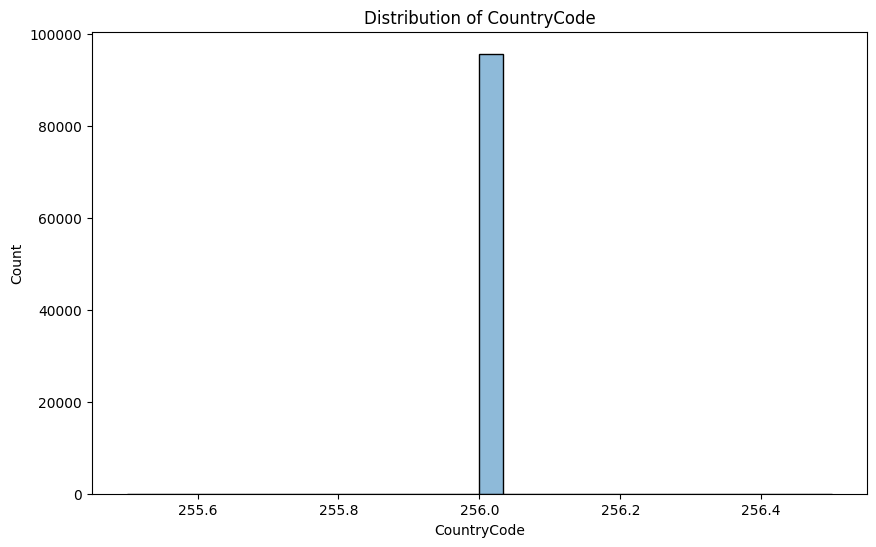

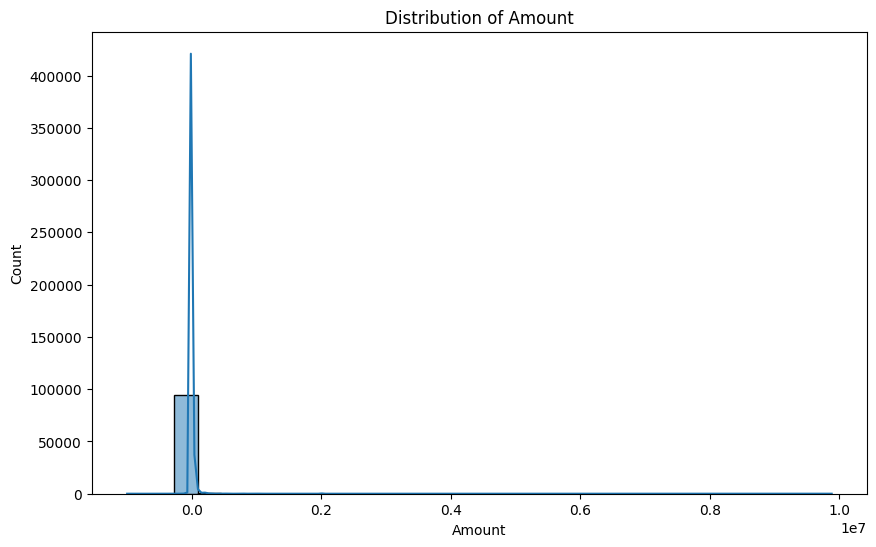

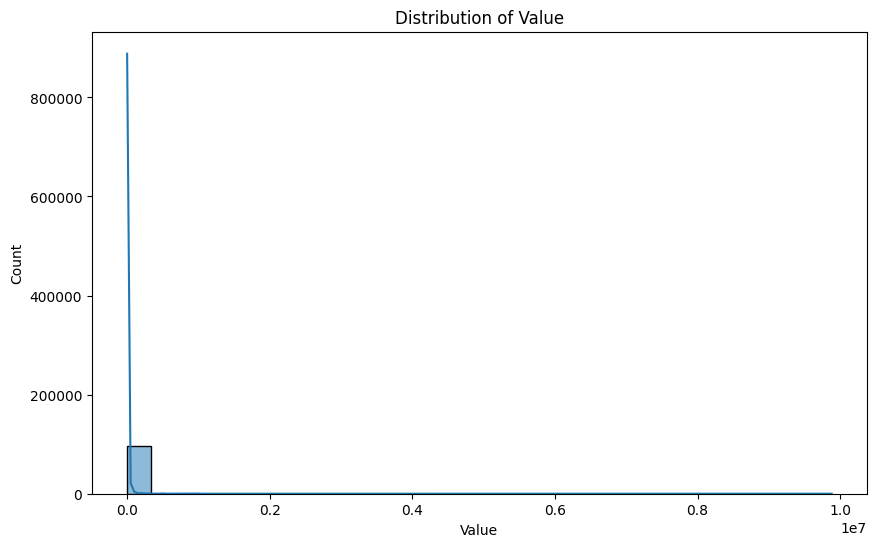

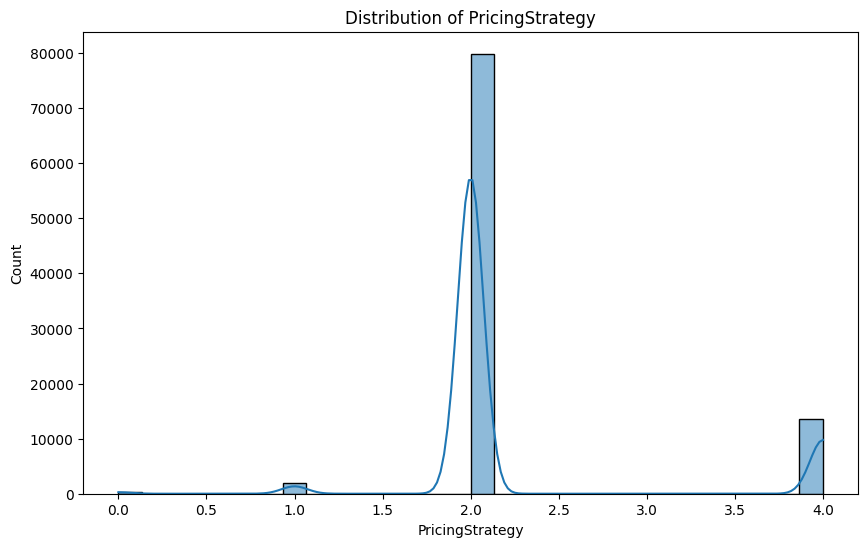

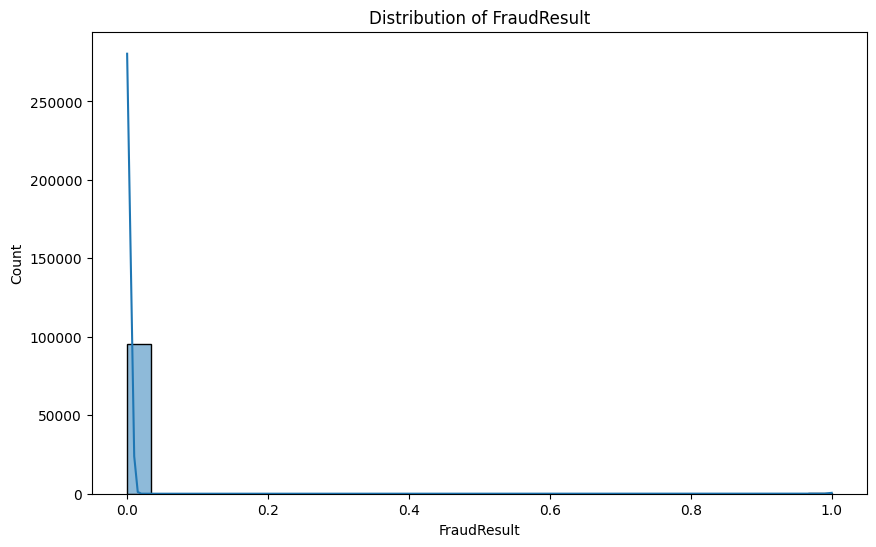

In [7]:
print("\nVisualizing the distribution of numerical features...")
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### 4. Distribution of Categorical Features
#### Plot bar charts for categorical features to visualize frequency distribution

In [7]:
categorical_features = data.select_dtypes(include=[object]).columns.tolist()



In [8]:
print("\nVisualizing the distribution of categorical features...")
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


Visualizing the distribution of categorical features...


### 5. Correlation Analysis
#### Compute correlation matrix and visualize it

In [9]:
numerical_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix for numerical features
print("\nCorrelation matrix:")
correlation_matrix = numerical_data.corr()


Correlation matrix:


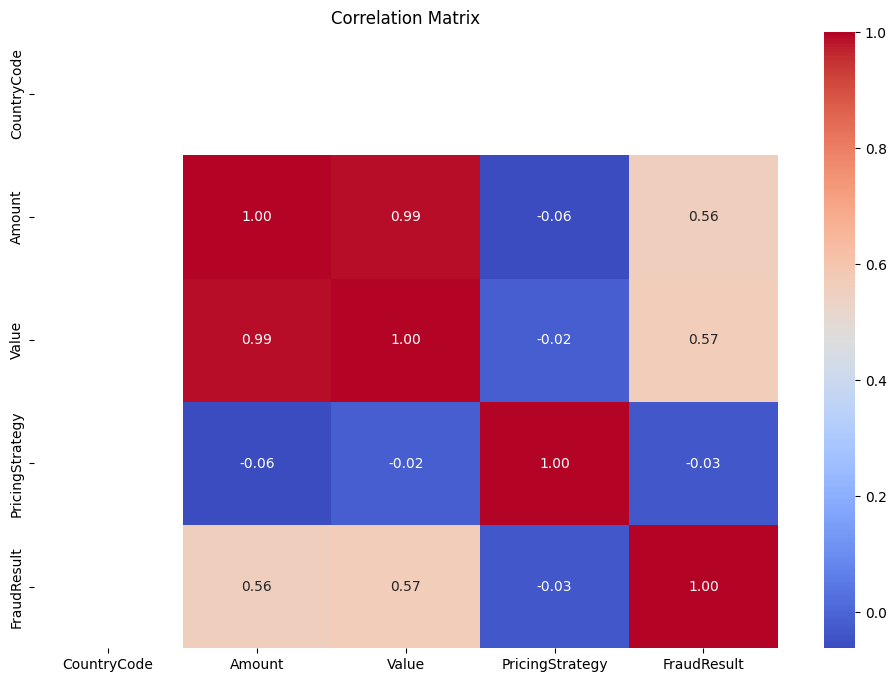

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Check correlation of numerical features with the target variable 'FraudResult'
print("\nCorrelations with FraudResult:")
fraud_corr = correlation_matrix['FraudResult'].sort_values(ascending=False)
print(fraud_corr)


Correlations with FraudResult:
FraudResult        1.000000
Value              0.566739
Amount             0.557370
PricingStrategy   -0.033821
CountryCode             NaN
Name: FraudResult, dtype: float64


### 6. Identifying Missing Values
#### Check for missing values in the dataset

In [13]:
print("\nMissing values in the dataset:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values


Missing values in the dataset:
Series([], dtype: int64)


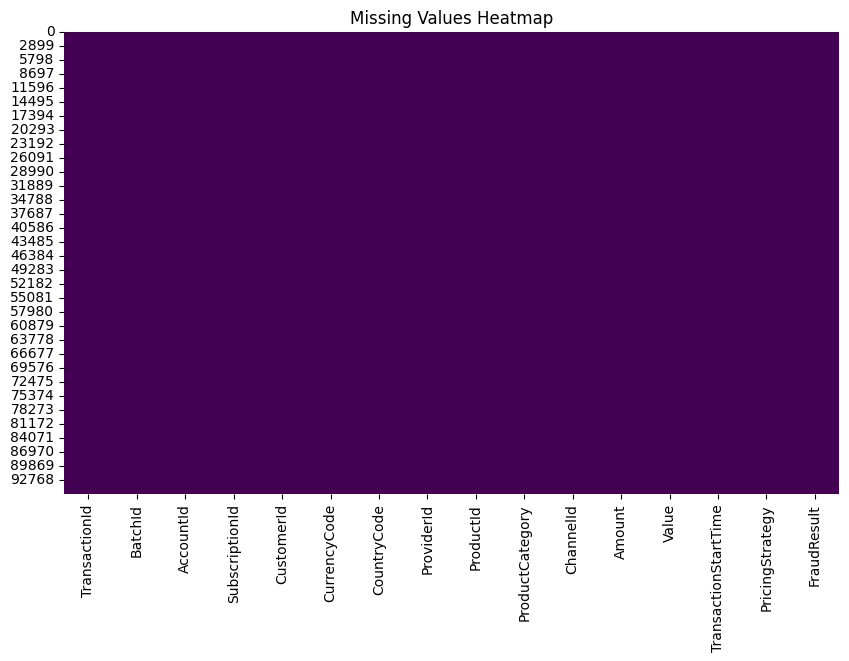

In [14]:
# Visualizing missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### 7. Outlier Detection
#### Detect outliers using box plots for numerical features


Visualizing outliers with box plots...


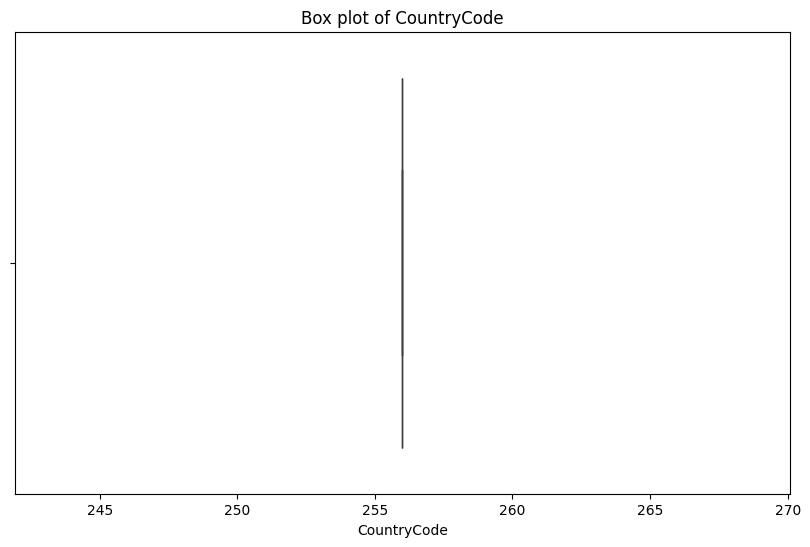

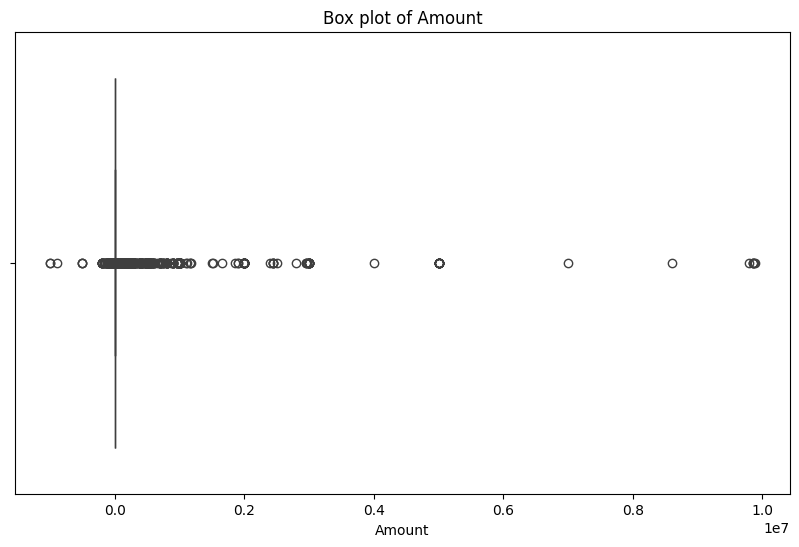

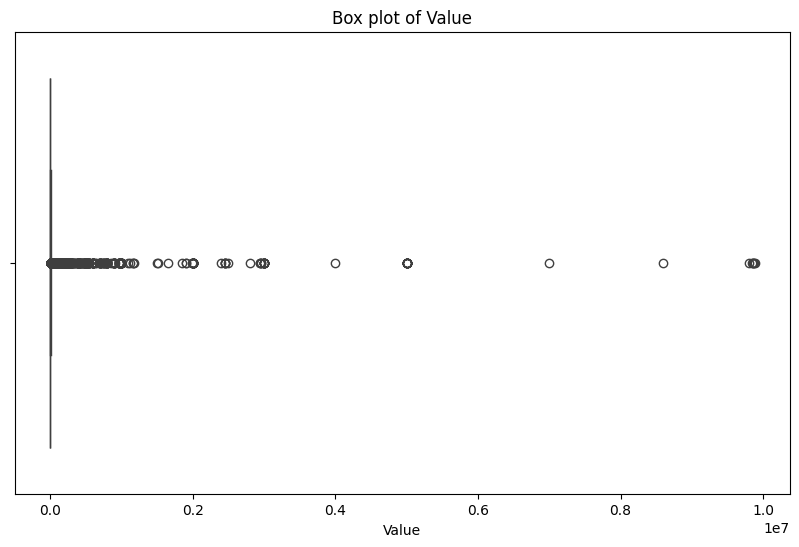

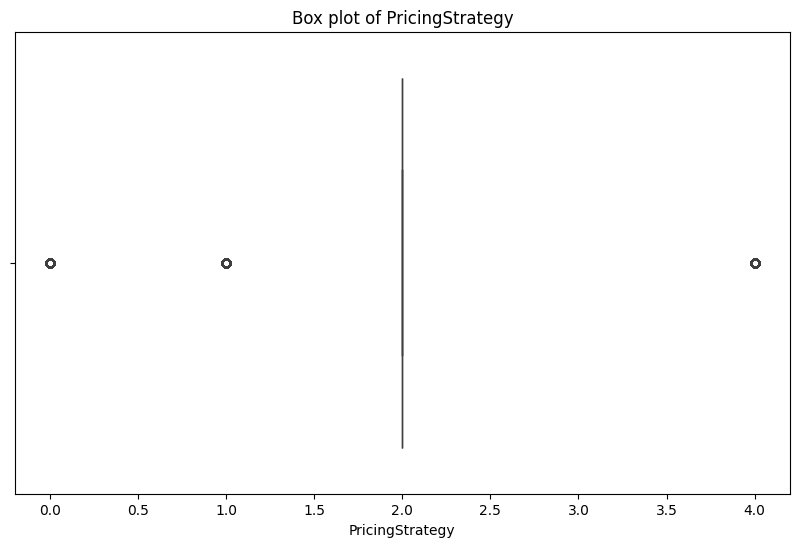

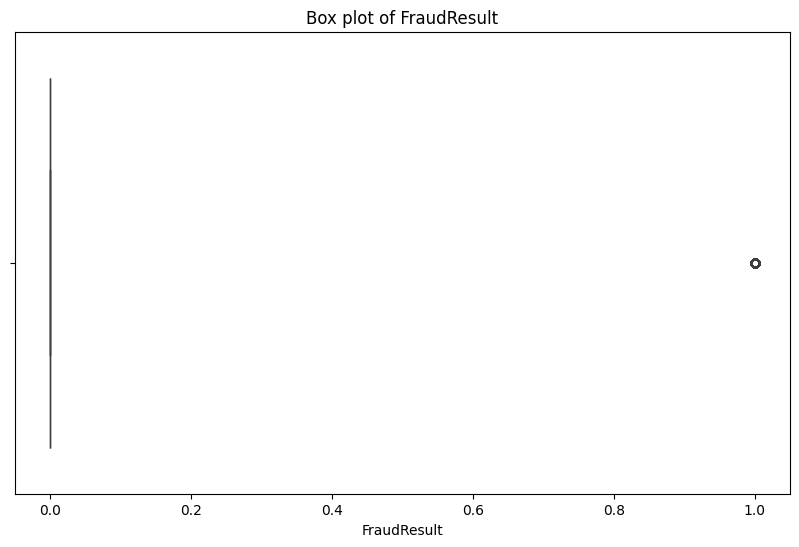

In [15]:
print("\nVisualizing outliers with box plots...")
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

### Remove or handle outliers if necessary (Example using Z-score method)

In [16]:
z_scores = np.abs(stats.zscore(data[numerical_features].dropna()))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of outliers detected: {outliers.sum()}")


Number of outliers detected: 618


In [17]:
# Drop outliers if needed
data_cleaned = data[~outliers]
print(f"\nDataset shape after removing outliers: {data_cleaned.shape}")


Dataset shape after removing outliers: (95044, 16)
